# Chapter 1: Introduction

## AstroML Data Set Tools

Most of the astronomical data in this notebook and subsequent notebooks were obtained by the Sloan Digital Sky Survey (SDSS), which operated in three phases starting in 1998. 

- The camera used in this survey imaged the sky in five <a href="https://en.wikipedia.org/wiki/Photometric_system">photometric bands</a> (y,g,r,i, and z). Hence, the data released contained photometry for 357 million unique sources detected in ~12,000 $deg^2$ of sky (the full sky is equivalent to ~40,000 $deg^2$.

- The survey measure spectra for more than 600 galaxies, quasars and stars in each single observation. Wavelength: 3800-9200, spectral resolving power of R ~2000. 

- The data includes about 1.5 million spectra, with about 900,000 galaxies, 120,000 quasars and 460,000 stars. 

- Total data size is 60 TB

There is also the Two Micron All Sky Survey (2MASS) photometry for stars from the SDSS Standard Star Catalog. It survey the entire sky in near-infrared light. 

- It spans the wavelength range 1.2-2.2 $\mu$m

Finally there are other dataset that will be used like the LINEAR database features time-domain observations of thousands of variable stars; the LOGO  database: simulated data set from a gravitational wave observatory, and asteroid data file includes orbital data that come from a large variety of sources.

In [1]:
import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### SDSS imaging photometry

Details of all listed parameters retured by the above query can be found in the link below

http://skyserver.sdss.org/dr8/en/help/browser/browser.asp



In [10]:
from astroML.datasets import fetch_imaging_sample
import matplotlib.pyplot as plt

In [11]:
data = fetch_imaging_sample(data_home="dataset/")

In [12]:
data.shape,len(data[0]),len(data.dtype.names)

((330753,), 26, 26)

In [13]:
",".join(data.dtype.names)

'ra,dec,run,rExtSFD,uRaw,gRaw,rRaw,iRaw,zRaw,uErr,gErr,rErr,iErr,zErr,uRawPSF,gRawPSF,rRawPSF,iRawPSF,zRawPSF,upsfErr,gpsfErr,rpsfErr,ipsfErr,zpsfErr,type,ISOLATED'

`RA` (right ascension) and `DEC` (declination) are to the sky what longitude and latitude are to the surface of the Earth. `RA` corresponds to east/west direction (like longitude), while `Dec` measures north/south directions, like latitude.

`RA` is indeed measured in *hours, minutes, and seconds*. This is because as the Earth rotates, we see different parts of the sky throughout the night. What this means is that if an object at, say 3h 5m 38s, is overhead now, in an hour from now an object at 4h 5m 38s will be overhead, and so forth. 0 hours right ascension is by convention the right ascension of the sun on the vernal equinox, March 21. So your object is 3h 5m 38s east of the vernal equinox.

`Declination` is measured in *degrees, arcminutes, and arcseconds*. There are 60 arcmin in a degree, and 60 arcsec in an arcmin. The symbols for arcmin and arcsec are the same as for feet and inches. (Although sometimes we draw a little arc over the ' and " signs to tell them apart from the feet and inches signs.) So your object is 48 degrees, 50 arcminutes, and 2 arcseconds north of the celestial equator, which is the origin of the declination system at exactly 0 degrees. The celestial equator is the part of the sky which is directly overhead the equator of the Earth. The north star is at about +90 degrees, while the south pole would be at -90 degrees, just like latitude on Earth.

`Declination` tells you how high overhead your object eventually will rise. So your object at +48 degrees declination would pass directly over a point on the Earth at 48 degrees north latitude each night. If you were standing at, say, 38 degrees north latitude, the object would reach its greatest elevation (height) 48-38=10 degrees north on the sky from overhead.

In [14]:
data['ra'][:5],data['dec'][:5]

(array([0.358174, 0.358382, 0.357898, 0.35791 , 0.358881]),
 array([-0.508718, -0.551157, -0.570892, -0.426526, -0.505625]))

In [15]:
data['type']

array([3, 6, 3, ..., 3, 6, 3], dtype=int16)

Below we plot <strong>r vs g - r</strong> color-magnitude diagrams and the <strong>r - i vs g - r</strong> color-color diagrams for galaxies, and stars from the SDSS imaging catelog

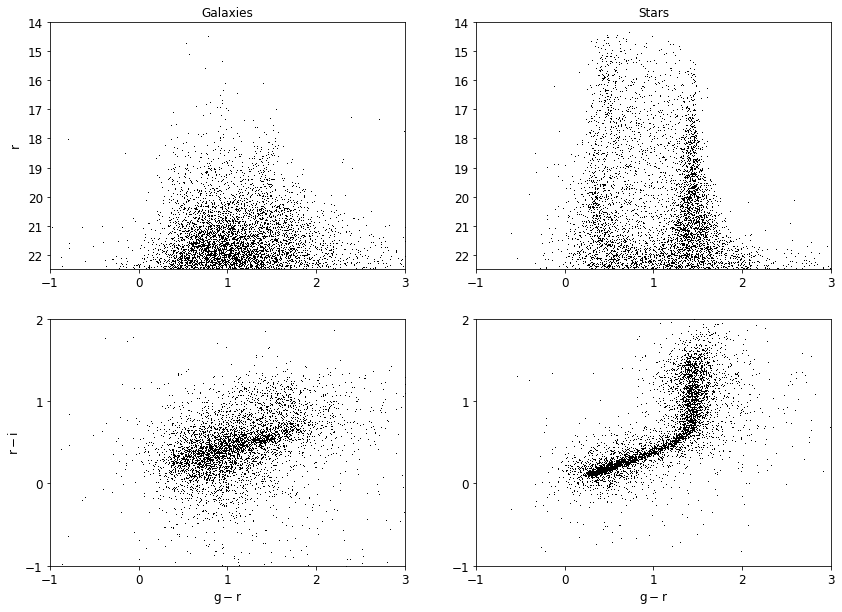

In [16]:
%matplotlib inline
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general

import numpy as np
import matplotlib.pyplot as plt
from astroML.datasets import fetch_imaging_sample

def get_stars_and_galaxies(Nstars=5000, Ngals=5000):
    """Get the subset of star/galaxy data to plot"""
    data = fetch_imaging_sample(data_home="dataset/")

    objtype = data['type']

    stars = data[objtype == 6][:Nstars]
    galaxies = data[objtype == 3][:Ngals]

    return stars, galaxies


def plot_stars_and_galaxies(stars, galaxies):
    """Plot the star and galaxy data"""
    # Note: we use plot() rather than scatter() because it's more efficient
    # for large numbers of points.
    # Scatter should be used only when points need to be different colors
    # and/or sizes
    plot_kwargs = dict(color='k', linestyle='none',linewidth=3, marker=',')

    fig = plt.figure(figsize=(14, 10))

    ax1 = fig.add_subplot(221)
    ax1.plot(galaxies['gRaw'] - galaxies['rRaw'],
             galaxies['rRaw'],
             **plot_kwargs)

    ax2 = fig.add_subplot(223, sharex=ax1)
    ax2.plot(galaxies['gRaw'] - galaxies['rRaw'],
             galaxies['rRaw'] - galaxies['iRaw'],
             **plot_kwargs)

    ax3 = fig.add_subplot(222, sharey=ax1)
    ax3.plot(stars['gRaw'] - stars['rRaw'],
             stars['rRaw'],
             **plot_kwargs)

    ax4 = fig.add_subplot(224, sharex=ax3, sharey=ax2)
    ax4.plot(stars['gRaw'] - stars['rRaw'],
             stars['rRaw'] - stars['iRaw'],
             **plot_kwargs)

    # set labels and titles
    ax1.set_ylabel(r'${\rm r}$')
    ax2.set_ylabel(r'${\rm r - i}$')
    ax2.set_xlabel(r'${\rm g - r}$')
    ax4.set_xlabel(r'${\rm g - r}$')
    ax1.set_title('Galaxies')
    ax3.set_title('Stars')

    # set axis limits
    ax2.set_xlim(-1, 3)
    ax3.set_ylim(22.5, 14)
    ax4.set_xlim(-1, 3)
    ax4.set_ylim(-1, 2)

    # adjust tick spacings on all axes
    for ax in (ax1, ax2, ax3, ax4):
        ax.xaxis.set_major_locator(plt.MultipleLocator(1))
        ax.yaxis.set_major_locator(plt.MultipleLocator(1))

#------------------------------------------------------------
# Generate and show the plot
stars, galaxies = get_stars_and_galaxies()
plot_stars_and_galaxies(stars, galaxies)
plt.show()

## Fetching and Displaying SDSS Spectra

In [17]:
from astroML.datasets import fetch_sdss_spectrum

In [18]:
plate = 1615
mjd = 53166
fiber = 513

In [19]:
spec = fetch_sdss_spectrum(plate,mjd,fiber,data_home="dataset/")

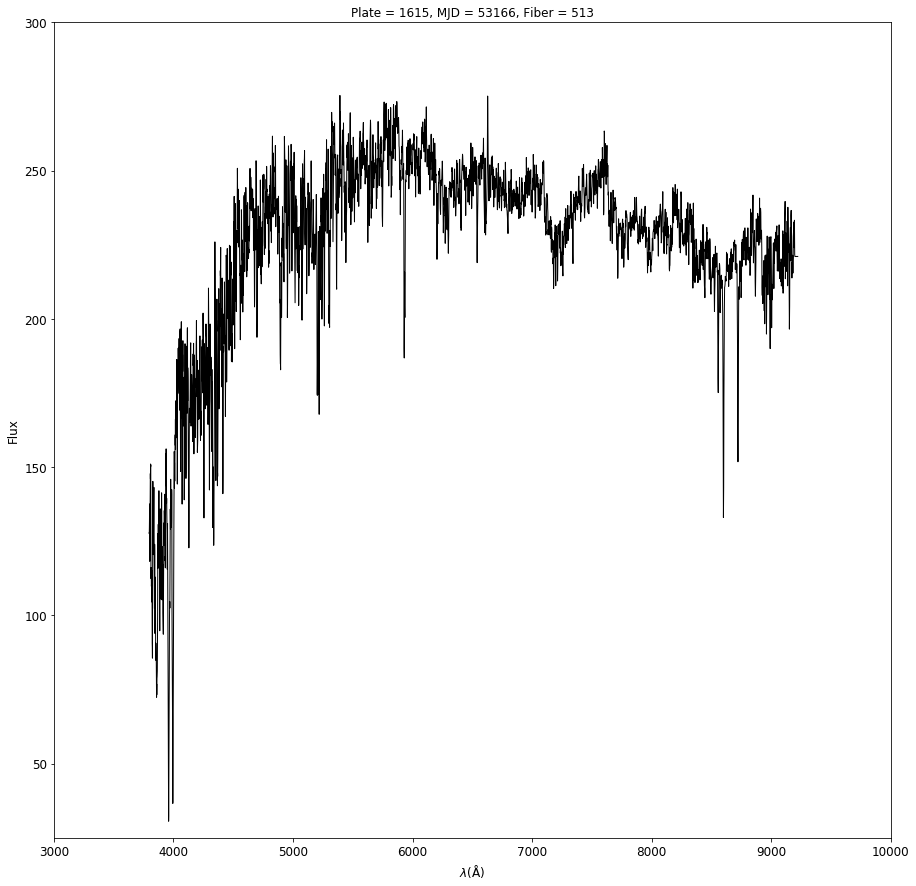

In [20]:
fig, ax = plt.subplots(figsize=(5, 3.75))
fig.set_size_inches((15,15))
ax.plot(spec.wavelength(), spec.spectrum, '-k', lw=1)

ax.set_xlim(3000, 10000)
ax.set_ylim(25, 300)

ax.set_xlabel(r'$\lambda {(\rm \AA)}$')
ax.set_ylabel('Flux')
ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())

plt.show()

Determining plate, mjd, and fiver numbers of spectra in a basic query.

In [12]:
from astroML.datasets import tools

In [13]:
target = tools.TARGET_GALAXY

In [14]:
target

64

In [17]:
plate, mjd, fib = tools.query_plate_mjd_fiber(5,primtarget=target)

In [18]:
plate,mjd,fib

(array([266, 266, 266, 266, 266]),
 array([51630, 51630, 51630, 51630, 51630]),
 array([1, 2, 4, 6, 7]))

In [19]:
for p,m,f in zip(plate,mjd,fib):
    _ = fetch_sdss_spectrum(p,m,f,data_home="dataset/")

## Galaxies with SDSS Spectroscopic Data

In [21]:
from astroML.datasets import fetch_sdss_specgals

In [22]:
data = fetch_sdss_specgals(data_home="dataset/")

In [23]:
data.shape

(661598,)

In [24]:
",".join(data.dtype.names)

'ra,dec,mjd,plate,fiberID,z,zErr,rChi2,velDisp,velDispErr,extinction_r,petroMag_r,psfMag_r,psfMagErr_r,modelMag_u,modelMagErr_u,modelMag_g,modelMagErr_g,modelMag_r,modelMagErr_r,modelMag_i,modelMagErr_i,modelMag_z,modelMagErr_z,petroR50_r,petroR90_r,nii_6584_flux,nii_6584_flux_err,h_alpha_flux,h_alpha_flux_err,oiii_5007_flux,oiii_5007_flux_err,h_beta_flux,h_beta_flux_err,h_delta_flux,h_delta_flux_err,d4000,d4000_err,bptclass,lgm_tot_p50,sfr_tot_p50,objID,specObjID'

In [25]:
data = data[:10000]

In [26]:
u = data['modelMag_u']
r = data['modelMag_r']
rPetro = data['petroMag_r']

Text(0,0.5,'$r_{petrosian}$')

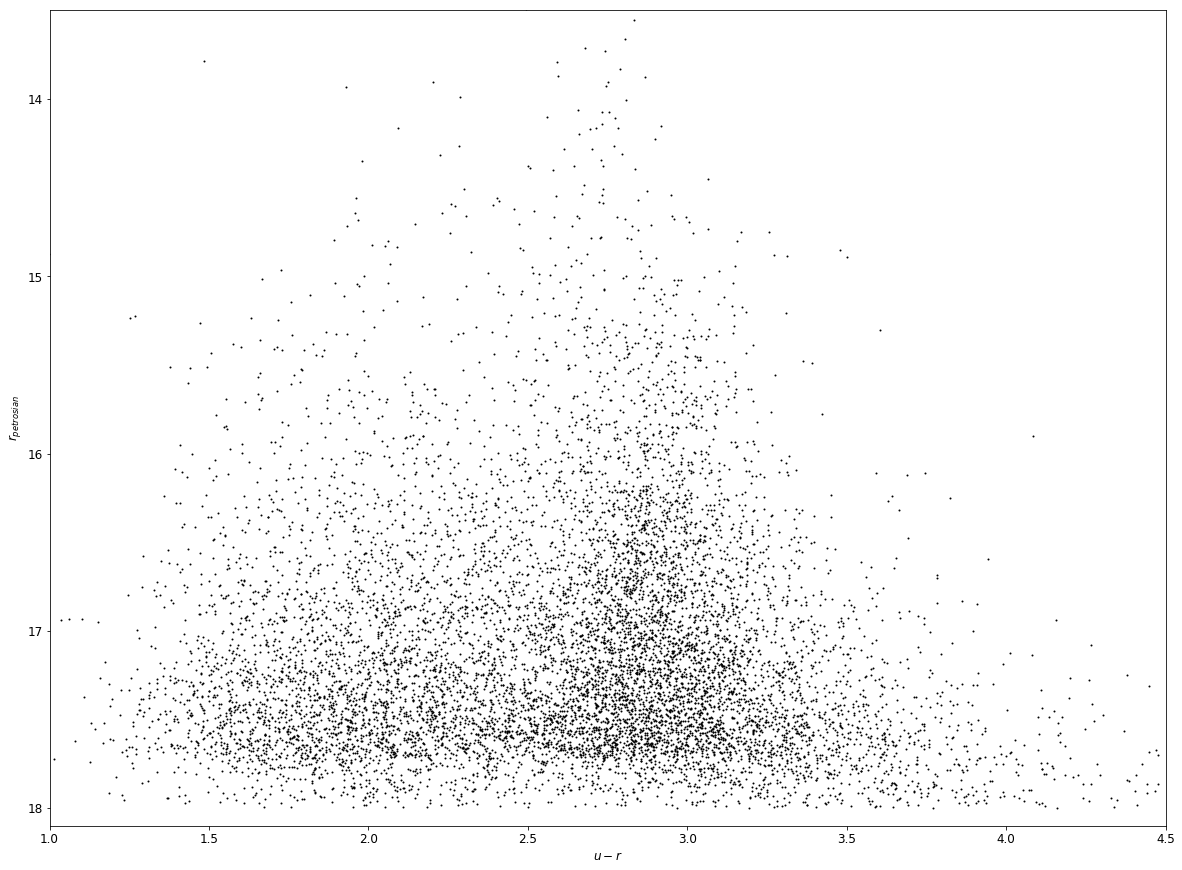

In [27]:
ax = plt.axes()
plt.gcf().set_size_inches((20,15))
ax.scatter(u-r, rPetro, s =4, lw=0, c='k')
ax.set_xlim(1,4.5)
ax.set_ylim(18.1,13.5)
ax.set_xlabel('$u - r$')
ax.set_ylabel('$r_{petrosian}$')

## SDS DR7 Quasar Catalog

In [28]:
from astroML.datasets import fetch_dr7_quasar

In [29]:
data = fetch_dr7_quasar(data_home="dataset/")

In [30]:
data.shape

(105783,)

In [31]:
",".join(data.dtype.names)

'sdssID,RA,dec,redshift,mag_u,err_u,mag_g,err_g,mag_r,err_r,mag_i,err_i,mag_z,err_z,mag_J,err_J,mag_H,err_H,mag_K,err_K,specobjid'

In [32]:
data = data[:10000]

In [33]:
r = data['mag_r']
i = data['mag_i']
z = data['redshift']

Text(0,0.5,'r-i')

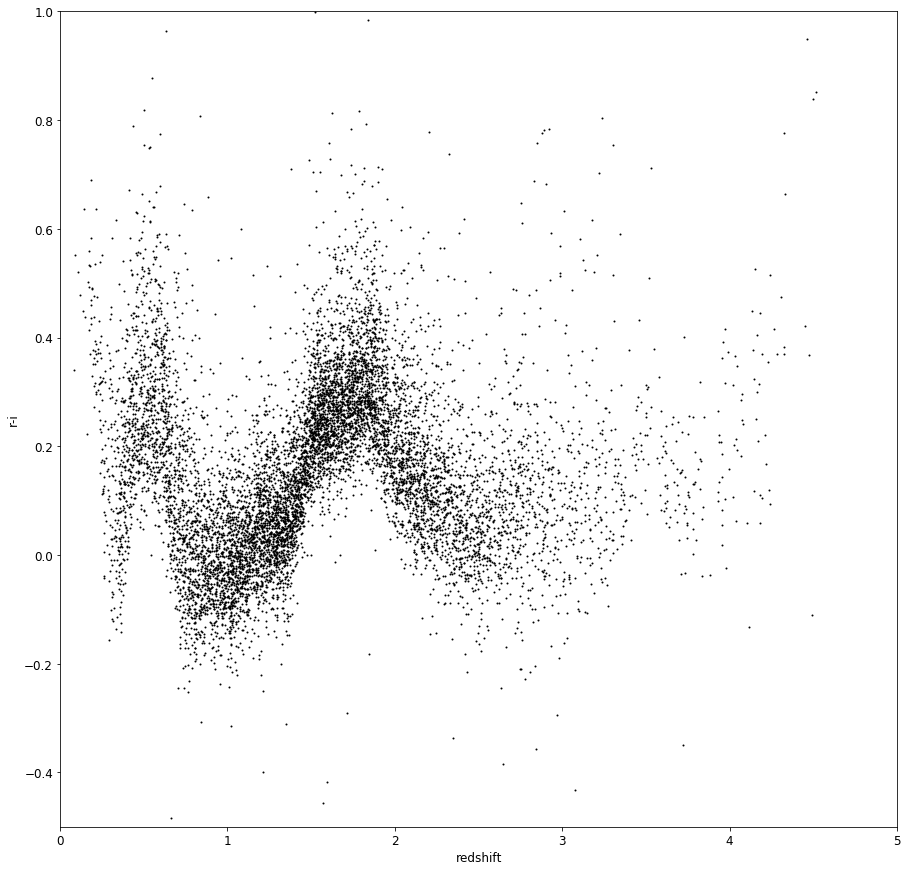

In [35]:
plt.gcf().set_size_inches((15,15))
ax = plt.axes()
ax.scatter(z,r-i,s=4, linewidth=0, c='black')
ax.set_xlim(0,5)
ax.set_ylim(-0.5,1)
ax.set_xlabel('redshift')
ax.set_ylabel('r-i')

## SEGUE Stellar Parameters Pipeline Parameters

In [37]:
from astroML.datasets import fetch_sdss_sspp

In [38]:
data = fetch_sdss_sspp()

In [39]:
data.shape

(327260,)

In [40]:
",".join(data.dtype.names)

'ra,dec,Ar,upsf,uErr,gpsf,gErr,rpsf,rErr,ipsf,iErr,zpsf,zErr,pmL,pmB,pmErr,mjd,plate,fiber,SNR,FeH,FeHErr,Teff,TeffErr,logg,loggErr,alphFe,alphFeErr,radVel,radVelErr'

In [41]:
data = data[:10000]

In [42]:
rpsf = data['rpsf']
data = data[(rpsf > 15) & (rpsf < 19)]
logg = data['logg']
Teff = data['Teff']

Text(0,0.5,'$\\mathrm{log_{10}[g / (cm/s^2)]}$')

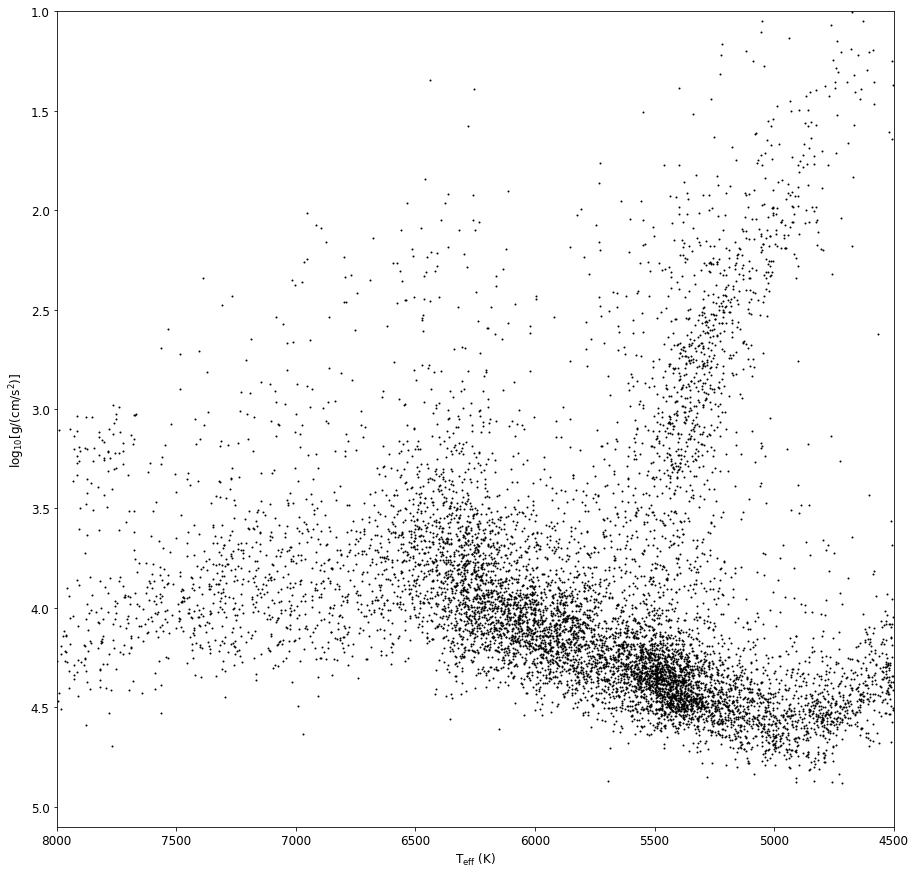

In [43]:
plt.gcf().set_size_inches((15,15))
ax = plt.axes()
ax.scatter(Teff,logg,s=4, lw=0, c='k')
ax.set_xlim(8000,4500)
ax.set_ylim(5.1,1)
ax.set_xlabel(r'$\mathrm{T_{eff}\ (K)}$')
ax.set_ylabel(r'$\mathrm{log_{10}[g / (cm/s^2)]}$')

## SDSS Standard Star Catalog from Strip 82

In [44]:
from astroML.datasets import fetch_sdss_S82standards

In [45]:
data = fetch_sdss_S82standards()

In [46]:
data.shape

(1006849,)

In [47]:
",".join(data.dtype.names)

'RA,DEC,RArms,DECrms,Ntot,A_r,Nobs_u,mmed_u,mmu_u,msig_u,mrms_u,mchi2_u,Nobs_g,mmed_g,mmu_g,msig_g,mrms_g,mchi2_g,Nobs_r,mmed_r,mmu_r,msig_r,mrms_r,mchi2_r,Nobs_i,mmed_i,mmu_i,msig_i,mrms_i,mchi2_i,Nobs_z,mmed_z,mmu_z,msig_z,mrms_z,mchi2_z'

In [48]:
data = data[:10000]

In [49]:
g = data['mmu_g']
r = data['mmu_r']
i = data['mmu_i']

Text(0,0.5,'r-i')

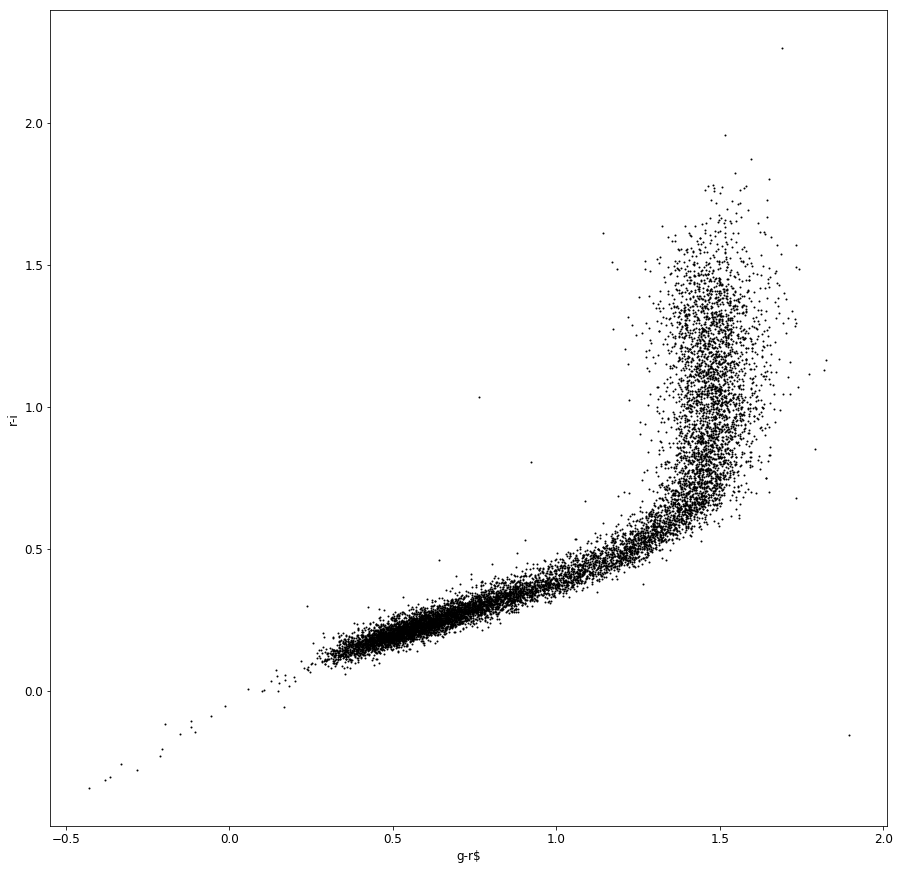

In [50]:
plt.gcf().set_size_inches((15,15))
ax = plt.axes()
ax.scatter(g-r,r-i,s=4, lw=0, c='k')
ax.set_xlabel(r'g-r$')
ax.set_ylabel(r'r-i')

## LINEAR Stellar Light Curves

Track near-Earth astroids (the so-called "killer astroids"). It contails a unique combination of sensitivity, sky coverage, and observational cadence. Note that its photometric calibration is fairly inaccurate because the effort was focused on astrometric observations of asteroids. The data here is recalibrated. 

In [51]:
from astroML.datasets import fetch_LINEAR_sample

In [52]:
data = fetch_LINEAR_sample()

In [53]:
gr = data.targets['gr']
ri = data.targets['ri']
logP = data.targets['LP1'] # log_10(period) in days

In [54]:
gr.shape

(7010,)

In [55]:
_id = data.ids[2756] # choose an id from the sample
_id

18527462

In [56]:
t, mag, dmag = data[_id].T

In [57]:
# access light curve data
logP = data.get_target_parameter(_id, 'LP1')

In [58]:
%matplotlib inline
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from astroML.datasets import fetch_LINEAR_sample, fetch_LINEAR_geneva


#------------------------------------------------------------
# Get data for the plot
data = fetch_LINEAR_sample()
geneva = fetch_LINEAR_geneva()  # contains well-measured periods

In [59]:
# Compute the phased light curve for a single object.
# the best-fit period in the file is not accurate enough
# for light curve phasing.  The frequency below is
# calculated using Lomb Scargle (see chapter10/fig_LINEAR_LS.py)
_id = 18525697
omega = 10.82722481
t, y, dy = data[_id].T
phase = (t * omega * 0.5 / np.pi + 0.1) % 1

In [60]:
# Select colors, magnitudes, and periods from the global set
targets = data.targets[data.targets['LP1'] < 2]
r = targets['r']
gr = targets['gr']
ri = targets['ri']
logP = targets['LP1']

In [61]:
# Cross-match by ID with the geneva catalog to get more accurate periods
targetIDs = [str(ID).lstrip('0') for ID in targets['objectID']]
genevaIDs = [ID.decode('utf-8').lstrip('0') for ID in geneva['LINEARobjectID']]

def safe_index(L, val):
    try:
        return L.index(val)
    except ValueError:
        return -1

ind = np.array([safe_index(genevaIDs, ID) for ID in targetIDs])
mask = (ind >= 0)

logP = geneva['logP'][ind[mask]]
r = r[mask]
gr = gr[mask]
ri = ri[mask]

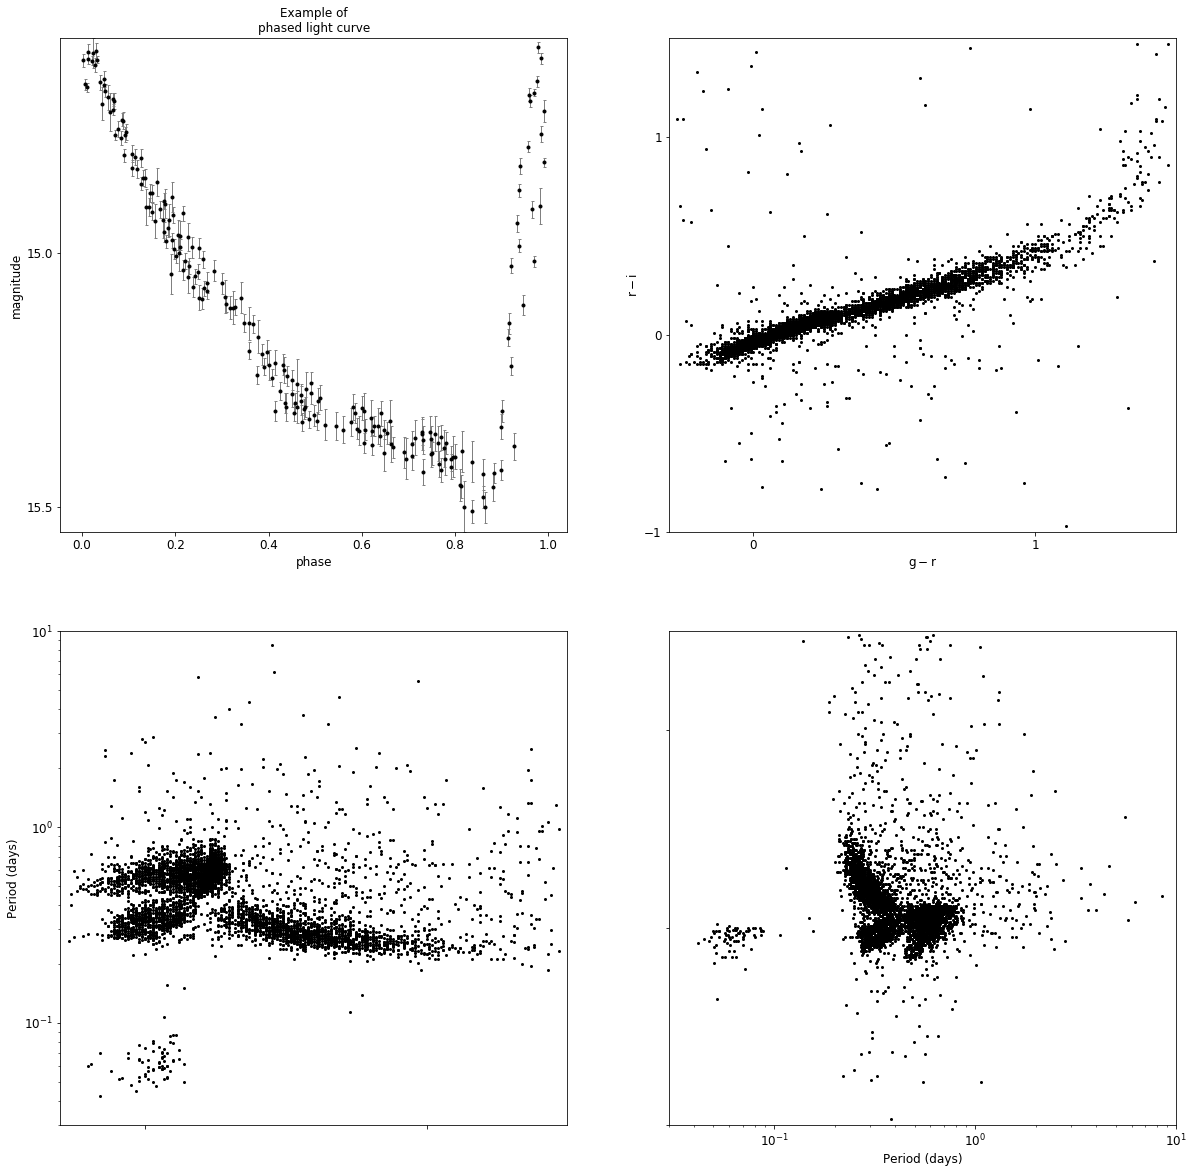

In [62]:
#------------------------------------------------------------
# plot the results
fig,ax = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches((20,20))

ax[0,0].errorbar(phase, y, dy, fmt='.', color='black', ecolor='gray',
             lw=1, ms=6, capsize=1.5)
ax[0,0].set_ylim((15.55, 14.577))
ax[0,0].set_xlabel('phase')
ax[0,0].set_ylabel('magnitude')
ax[0,0].yaxis.set_major_locator(plt.MultipleLocator(0.5))
ax[0,0].set_title("Example of\nphased light curve")

ax[0,1].plot(gr, ri, '.', color='black', markersize=4)
ax[0,1].set_xlim(-0.3, 1.5)
ax[0,1].set_ylim(-1.0, 1.5)
ax[0,1].xaxis.set_major_locator(plt.MultipleLocator(1.0))
ax[0,1].yaxis.set_major_locator(plt.MultipleLocator(1.0))
ax[0,1].set_xlabel(r'${\rm g-r}$')
ax[0,1].set_ylabel(r'${\rm r-i}$')

ax[1,0].plot(gr, 10 ** logP, '.', color='black', markersize=4)
ax[1,0].set_xlim(-0.3, 1.5)
ax[1,0].set_ylim(3E-2, 1E1)
ax[1,0].xaxis.set_major_locator(plt.MultipleLocator(1.0))
ax[1,0].xaxis.set_major_formatter(plt.NullFormatter())
ax[1,0].set_ylabel('Period (days)')
ax[1,0].set_yscale("log")

ax[1,1].plot(10 ** logP, ri, '.', color='black', markersize=4)
ax[1,1].set_xlim(3E-2, 1E1)
ax[1,1].set_ylim(-1.0, 1.5)
ax[1,1].yaxis.set_major_formatter(plt.NullFormatter())
ax[1,1].yaxis.set_major_locator(plt.MultipleLocator(1.0))
ax[1,1].set_xlabel('Period (days)')
ax[1,1].set_xscale("log")

plt.show()

## SDSS Moving Object Catalog

In [63]:
from astroML.datasets import fetch_moving_objects

In [64]:
data = fetch_moving_objects(Parker2008_cuts=True)

In [65]:
data.shape

(33160,)

In [66]:
",".join(data.dtype.names)

'moID,sdss_run,sdss_col,sdss_field,sdss_obj,rowc,colc,mjd,ra,dec,lambda,beta,phi,vmu,vmu_err,vnu,vnu_err,vlambda,vbeta,mag_u,err_u,mag_g,err_g,mag_r,err_r,mag_i,err_i,mag_z,err_z,mag_a,err_a,mag_V,mag_B,ast_flag,ast_num,ast_designation,ast_det_count,ast_det_total,ast_flags,ra_comp,dec_comp,mag_comp,r_helio,r_geo,phase,cat_id,H,G,Arc,Epoch,a,e,i,asc_node,arg_peri,M,PEcat_id,aprime,eprime,sin_iprime'

In [67]:
data = data[:10000]

In [68]:
a = data['aprime']

In [69]:
sini = data['sin_iprime']

Text(0,0.5,'Sine of Inclination Anlge')

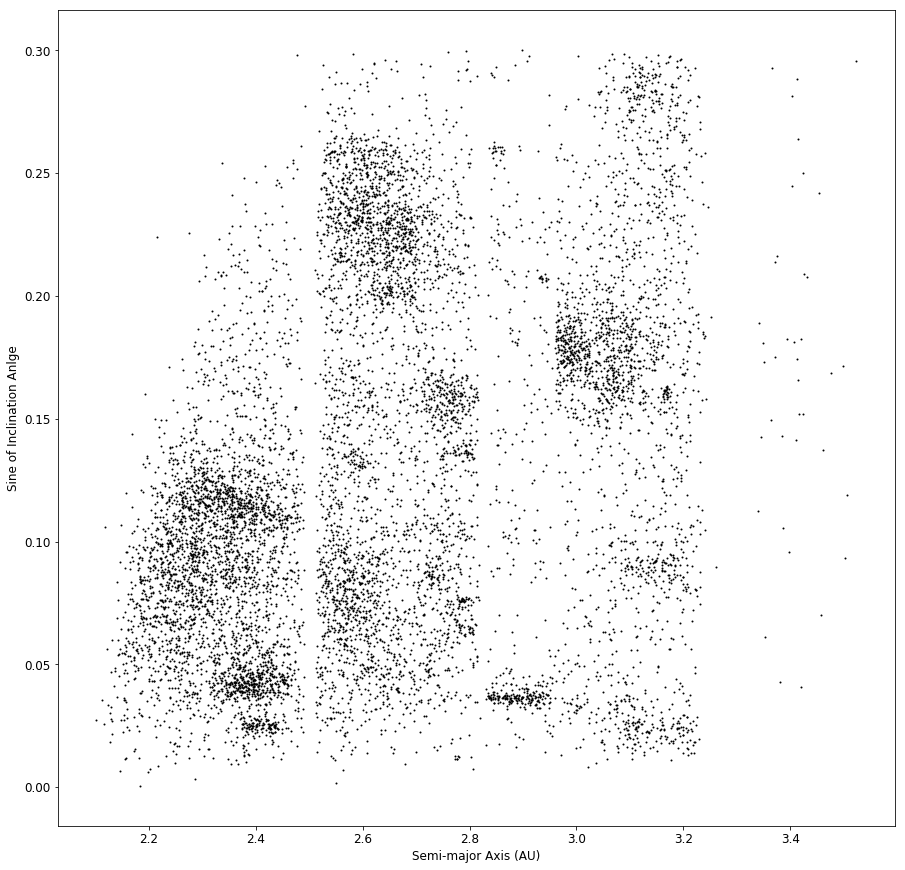

In [71]:
ax = plt.axes()
plt.gcf().set_size_inches((15,15))
ax.scatter(a,sini,s=4, lw=0, c='k')
ax.set_xlabel(r'Semi-major Axis (AU)')
ax.set_ylabel(r'Sine of Inclination Anlge')

<figure>
    <img src="imgs/kirkwood-gaps.jpg" width=400>
    <center><figcaption>Fig 1: Kirkwood gap</figcaption></center>
 </figure>

## Plotting Two-Dimensional Representations of Large Data Sets

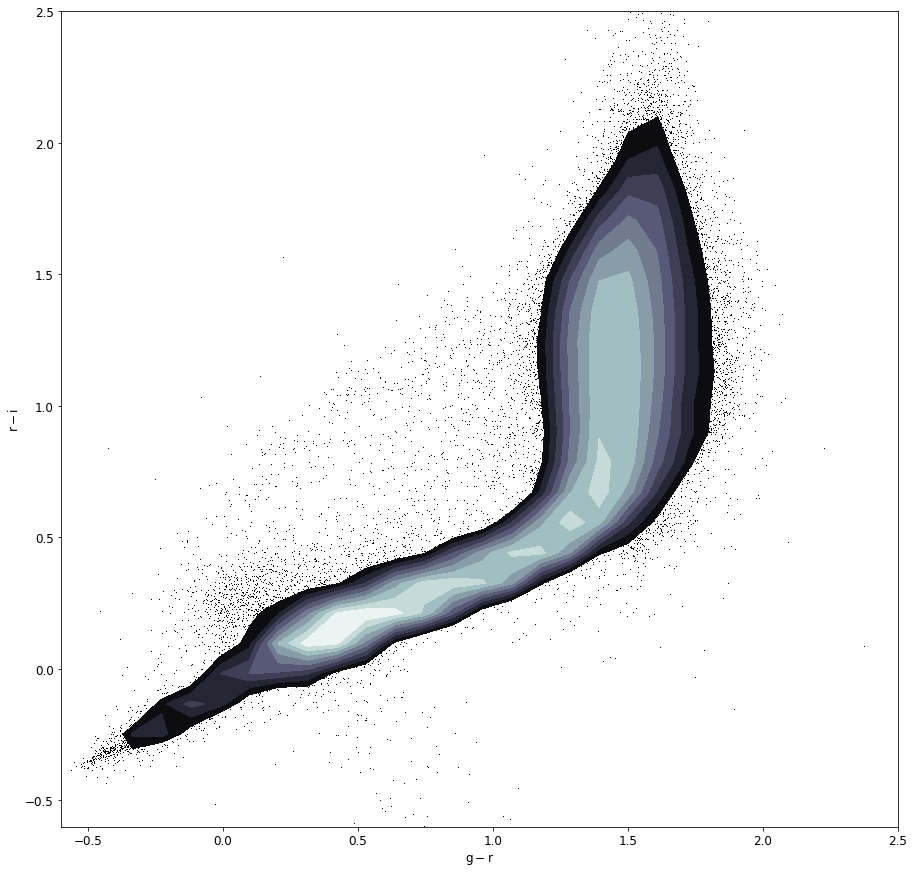

In [2]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from matplotlib import pyplot as plt

from astroML.plotting import scatter_contour
from astroML.datasets import fetch_sdss_S82standards


#------------------------------------------------------------
# Fetch the Stripe 82 standard star catalog

data = fetch_sdss_S82standards()

g = data['mmu_g']
r = data['mmu_r']
i = data['mmu_i']

#------------------------------------------------------------
# plot the results
fig, ax = plt.subplots()
fig.set_size_inches((15,15))
scatter_contour(g - r, r - i, threshold=200, log_counts=True, ax=ax,
                histogram2d_args=dict(bins=40),
                plot_args=dict(marker=',', linestyle='none', color='black'),
                contour_args=dict(cmap=plt.cm.bone))

ax.set_xlabel(r'${\rm g - r}$')
ax.set_ylabel(r'${\rm r - i}$')

ax.set_xlim(-0.6, 2.5)
ax.set_ylim(-0.6, 2.5)

plt.show()

The following graph shows the Hess diagram of the $r - i$ vs $g -r$ colors for the entire set of SDSS Stripe 82 stabdard stars. The pixels are colored with a logarithmic scaling

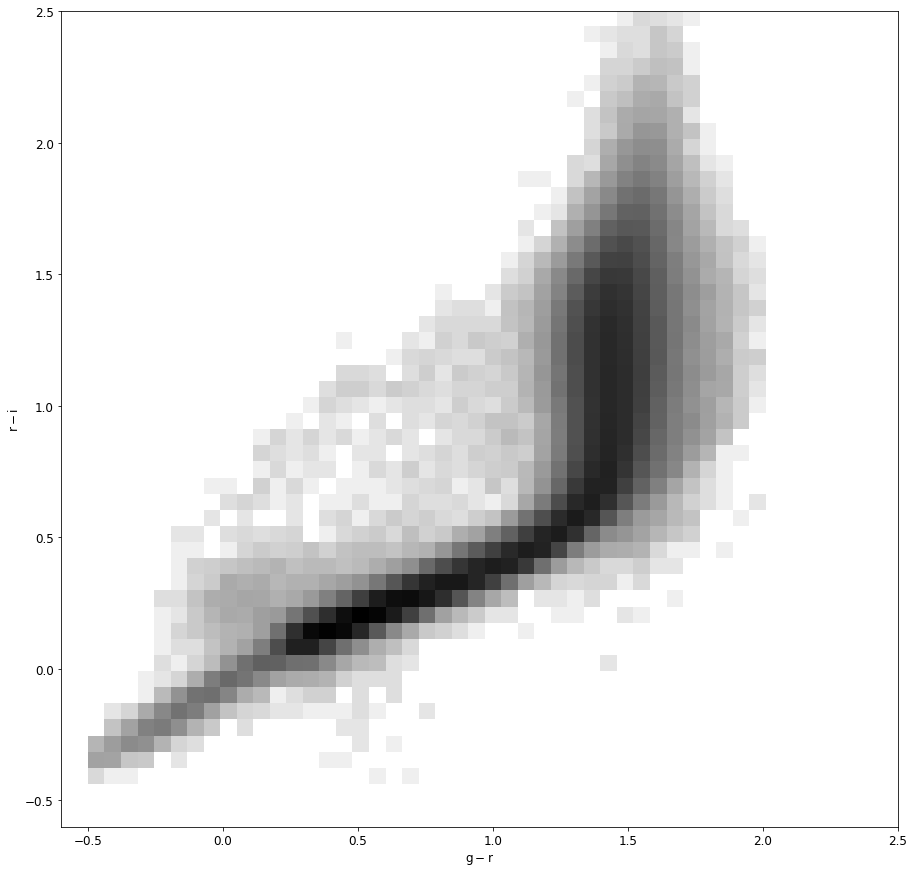

In [73]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from astroML.datasets import fetch_sdss_S82standards

#------------------------------------------------------------
# Fetch the stripe 82 data
data = fetch_sdss_S82standards()

g = data['mmu_g']
r = data['mmu_r']
i = data['mmu_i']

#------------------------------------------------------------
# Compute and plot the 2D histogram
H, xbins, ybins = np.histogram2d(g - r, r - i,
                                 bins=(np.linspace(-0.5, 2.5, 50),
                                       np.linspace(-0.5, 2.5, 50)))

# Create a black and white color map where bad data (NaNs) are white
cmap = plt.cm.binary
cmap.set_bad('w', 1.)

# Use the image display function imshow() to plot the result
fig, ax = plt.subplots()
fig.set_size_inches((15,15))
H[H == 0] = 1  # prevent warnings in log10
ax.imshow(np.log10(H).T, origin='lower',
          extent=[xbins[0], xbins[-1], ybins[0], ybins[-1]],
          cmap=cmap, interpolation='nearest',
          aspect='auto')

ax.set_xlabel(r'${\rm g - r}$')
ax.set_ylabel(r'${\rm r - i}$')

ax.set_xlim(-0.6, 2.5)
ax.set_ylim(-0.6, 2.5)

plt.show()

## Plotting in Higher Dimensions

The following graph shows a Hess diagram of the number per pixel (left) and [Fe/H] metallicity (center, right) of SEGUE Stellar Parameters Pipeline stars. In the center and right panels, contours representing the number density are overplotted for comparison. These two panels show identical data, but compare a grayscale and multicolor plotting scheme. This is an example of a situation in which multiple colors are very helpful in distinguishing close metallicity levels. This is the same data as shown in figure 1.5. 

In [74]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt


#------------------------------------------------------------
# Get SDSS SSPP data
from astroML.datasets import fetch_sdss_sspp
data = fetch_sdss_sspp()

In [75]:
# do some reasonable magnitude cuts
rpsf = data['rpsf']
data = data[(rpsf > 15) & (rpsf < 19)]

# get the desired data
logg = data['logg']
Teff = data['Teff']
FeH = data['FeH']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/astroML/stats/_binned_statistic.py:323: RuntimeWarning: invalid value encountered in true_divide
  result[a] /= flatcount
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in log10
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: divide by zero encountered in log10


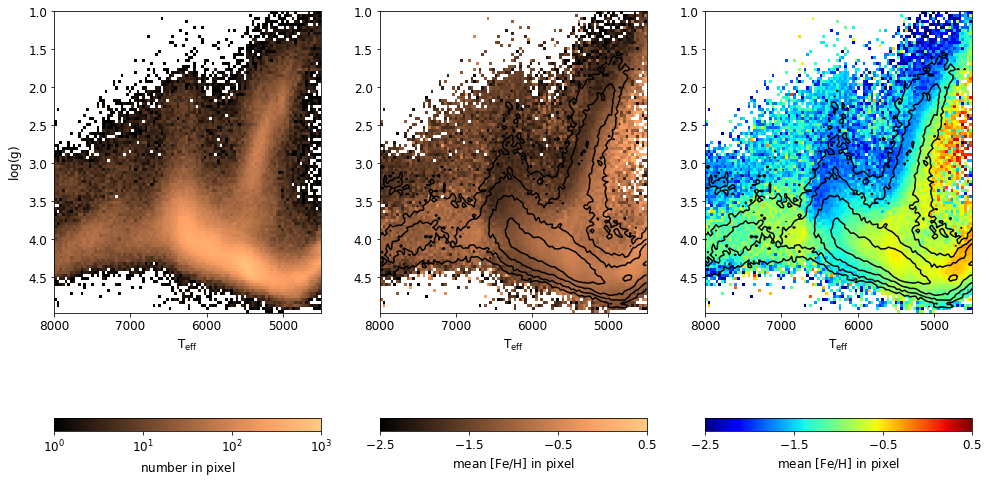

In [80]:
#------------------------------------------------------------
# Plot the results using the binned_statistic function
from astroML.stats import binned_statistic_2d
N, xedges, yedges = binned_statistic_2d(Teff, logg, FeH,
                                        'count', bins=100)
FeH_mean, xedges, yedges = binned_statistic_2d(Teff, logg, FeH,
                                               'mean', bins=100)

# Define custom colormaps: Set pixels with no sources to white
cmap = plt.cm.copper
cmap.set_bad('w', 1.)

cmap_multicolor = plt.cm.jet
cmap_multicolor.set_bad('w', 1.)

# Create figure and subplots
fig = plt.figure(figsize=(15, 8))
fig.subplots_adjust(wspace=0.22, left=0.1, right=0.95,
                    bottom=0.12, top=0.95)
#--------------------
# First axes:
ax = plt.subplot(131, xticks=[4000, 5000, 6000, 7000, 8000])
plt.imshow(np.log10(N.T), origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='auto', interpolation='nearest', cmap=cmap)
plt.xlim(xedges[-1], xedges[0])
plt.ylim(yedges[-1], yedges[0])
plt.xlabel(r'$\mathrm{T_{eff}}$')
plt.ylabel(r'$\mathrm{log(g)}$')

cb = plt.colorbar(ticks=[0, 1, 2, 3], pad=0.22,
                  format=r'$10^{%i}$', orientation='horizontal')
cb.set_label(r'$\mathrm{number\ in\ pixel}$')
plt.clim(0, 3)

#--------------------
# Second axes:
ax = plt.subplot(132, xticks=[4000, 5000, 6000, 7000, 8000])
plt.imshow(FeH_mean.T, origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='auto', interpolation='nearest', cmap=cmap)
plt.xlim(xedges[-1], xedges[0])
plt.ylim(yedges[-1], yedges[0])
plt.xlabel(r'$\mathrm{T_{eff}}$')

cb = plt.colorbar(ticks=np.arange(-2.5, 1, 1), pad=0.22,
                  format=r'$%.1f$', orientation='horizontal')
cb.set_label(r'$\mathrm{mean\ [Fe/H]\ in\ pixel}$')
plt.clim(-2.5, 0.5)

# Draw density contours over the colors
levels = np.linspace(0, np.log10(N.max()), 7)[2:]
plt.contour(np.log10(N.T), levels, colors='k',
            extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

#--------------------
# Third axes:
ax = plt.subplot(133, xticks=[4000, 5000, 6000, 7000, 8000])
plt.imshow(FeH_mean.T, origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='auto', interpolation='nearest', cmap=cmap_multicolor)
plt.xlim(xedges[-1], xedges[0])
plt.ylim(yedges[-1], yedges[0])
plt.xlabel(r'$\mathrm{T_{eff}}$')

cb = plt.colorbar(ticks=np.arange(-2.5, 1, 1), pad=0.22,
                  format=r'$%.1f$', orientation='horizontal')
cb.set_label(r'$\mathrm{mean\ [Fe/H]\ in\ pixel}$')
plt.clim(-2.5, 0.5)

# Draw density contours over the colors
levels = np.linspace(0, np.log10(N.max()), 7)[2:]
plt.contour(np.log10(N.T), levels, colors='k',
            extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

plt.show()